In [1]:
#import packages
import drawSvg as draw
import random as rand
import time

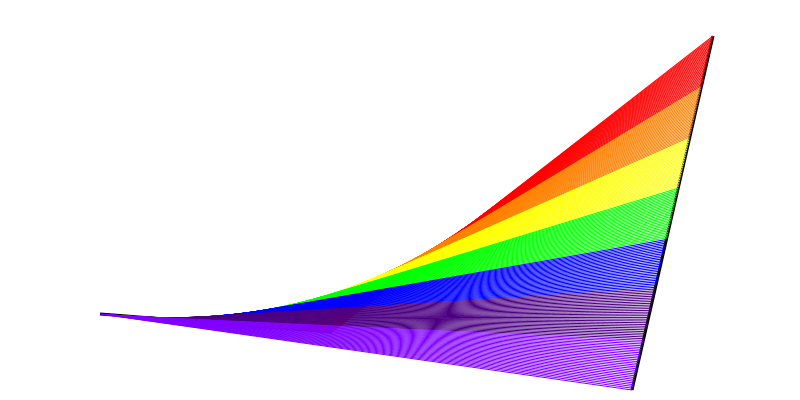

In [13]:
#draw random sticks with lines between them

#INPUTS
##---------------------------------------------------------------------##

#canvas height in pixels
canvas_height = 400

#canvas length in pixels
canvas_length = 800

#number of lines drawn between sticks (n>0: n=n+1; n=0)
num_lines = 200

#colors
#Available colors: default=black, red, green, blue, indigo, violet, yellow, orange, gray, 
#                  grayscale, red/blue, blue/green, red/green, rgb, **rainbow
stick_width = 3
stick_color = "black"
line_color = "rainbow"

##---------------------------------------------------------------------##

draw_sticks_rand(canvas_height, canvas_length, num_lines, stick_width, stick_color, line_color)

# Deprecated, use draw_sticks_rand()

In [15]:
#draw sticks with lines between them

#inputs
canvas_height = 200 #canvas height in pixels
canvas_length = 200 #canvas length in pixels
num_lines = 19 #number of lines drawn between sticks+1

#stick1
x1a = -50
y1a = 20
x2a = -70
y2a = 80

#stick2
x1b = 100
y1b = 40
x2b = 20
y2b = -60

draw_sticks(canvas_height, canvas_length, num_lines, x1a,y1a,x2a,y2a, x1b,y1b,x2b,y2b)

NameError: name 'color' is not defined

# Code:

In [3]:
#define the endpoints for stick1 & stick2 (random)

def random_sticks(canvas_length, canvas_height):

    x_min = -canvas_length/2
    x_max =  canvas_length/2
    y_min = -canvas_height/2
    y_max =  canvas_height/2
    
    #stick1
    x1a = rand.randint(x_min, x_max)
    y1a = rand.randint(y_min, y_max)
    x2a = rand.randint(x_min, x_max)
    y2a = rand.randint(y_min, y_max)
    
    #stick2
    x1b = rand.randint(x_min, x_max)
    y1b = rand.randint(y_min, y_max)
    x2b = rand.randint(x_min, x_max)
    y2b = rand.randint(y_min, y_max)
    
    return(x1a, y1a, x2a, y2a, x1b, y1b, x2b, y2b)

In [4]:
#find stick intercept

def intercept(slope, x, y):
    intercept = (slope*x)-y
    return(intercept)

In [5]:
#find stick slope

def slope(x1, y1, x2, y2):
    if (x2 - x1) == 0:
        gradient = 0
    
    else:
        gradient = (y2 - y1)/(x2 - x1)
        
    return(gradient)

In [6]:
#set RGB values from input "color"

def set_rgb(color):
    
    if color == "red":
        red   = 255
        green = "00"
        blue  = "00"
        
    elif color == "green":
        red   = "00"
        green = 255
        blue  = "00"
        
    elif color == "blue":
        red   = "00"
        green = "00"
        blue  = 255
        
    elif color == "indigo":
        red   = 75
        green = "00"
        blue  = 130
        
    elif color == "violet":
        red   = 128
        green = "00"
        blue  = 255
    
    elif color == "yellow":
        red   = 255
        green = 255
        blue  = "00"
        
    elif color == "orange":
        red   = 255
        green = 128
        blue  = "00"
        
    elif color == "gray":
        red   = 128
        green = 128
        blue  = 128
        
    else:
        red   = "00"
        green = "00"
        blue  = "00"
        
    color = "rgb(" + str(red) + "," + str(green) + "," + str(blue) + ")"
        
    return(color)

In [7]:
def draw_sticks_rand(canvas_height, canvas_length, num_lines, stick_width, stick_color, line_color):
    
    rgb = set_rgb(line_color)
    color = 0
    line_color = line_color.lower()
    color_switch = num_lines
    
    #define canvas
    d = draw.Drawing(canvas_length, canvas_height, origin="center")

    #get random sticks
    x1a, y1a, x2a, y2a, x1b, y1b, x2b, y2b = random_sticks(canvas_length, canvas_height)

    #draw sticks
    d.append(draw.Lines(x1a,y1a, x2a,y2a, stroke=stick_color, stroke_width = stick_width))
    d.append(draw.Lines(x1b,y1b, x2b,y2b, stroke=stick_color, stroke_width = stick_width))

    #find gradient of sticks
    stick1_slope = slope(x1a, y1a, x2a, y2a)
    stick2_slope = slope(x1b, y1b, x2b, y2b)

    #find intercept of sticks
    stick1_intercept = intercept(stick1_slope, x1a, y1a)
    stick2_intercept = intercept(stick2_slope, x1b, y1b)

    #draw lines between sticks
    if num_lines > 0:
        for i in range(0, num_lines+1):
            
            #set rgb values for line
            if line_color == "rgb":
                if color == 0:
                    rgb = "rgb(255,0,0)"
                    
                elif color == 1:
                    rgb = "rgb(0,255,0)"
                    
                else:
                    rgb = "rgb(0,0,255)"
                color = (color + 1) % 3 
                
            elif line_color == "red/blue":
                red   = 255 - int((i/num_lines)*255)
                green = "00"
                blue  = int((i/num_lines)*255)
                rgb   = "rgb(" + str(red) + ","+ str(green) + "," + str(blue) + ")"
                
            elif line_color == "red/green":
                red   = 255 - int((i/num_lines)*255)
                green = int((i/num_lines)*255)
                blue  = "00"
                rgb   = "rgb(" + str(red) + ","+ str(green) + "," + str(blue) + ")"
                
            elif line_color == "blue/green":
                red   = "00"
                green = int((i/num_lines)*255)
                blue  = 255 - int((i/num_lines)*255)
                rgb   = "rgb(" + str(red) + ","+ str(green) + "," + str(blue) + ")"
            
            elif line_color == "grayscale":
                rgb   = int((i/num_lines)*255)
                rgb   = "rgb(" + str(rgb) + "," + str(rgb) + "," + str(rgb) + ")"
                
            elif line_color == "rainbow":
                if color_switch >= ((6/7)*num_lines):
                    rgb = "rgb(255,0,0)"
                elif ((6/7)*num_lines) > color_switch >= ((5/7)*num_lines):
                    rgb = "rgb(255,128,0)"
                elif ((5/7)*num_lines) > color_switch >= ((4/7)*num_lines):
                    rgb = "rgb(255,255,0)"
                elif ((4/7)*num_lines) > color_switch >= ((3/7)*num_lines):
                    rgb = "rgb(0,255,0)"
                elif ((3/7)*num_lines) > color_switch >= ((2/7)*num_lines):
                    rgb = "rgb(0,0,255)"
                elif ((2/7)*num_lines) > color_switch >= ((1/7)*num_lines):
                    rgb = "rgb(75,0,130)"
                else:
                    rgb = "rgb(128,0,255)"
                color_switch -= 1    
               
            else:
                rgb = set_rgb(line_color)
        
            #calculate geometry for drawing a line
            x1 = (1-i/num_lines)*(x1a)+(i/num_lines)*(x2a)
            x2 = (1-i/num_lines)*(x1b)+(i/num_lines)*(x2b)
            y1 = (stick1_slope*x1)-(stick1_intercept)
            y2 = (stick2_slope*x2)-(stick2_intercept)
            
            #draw lines
            d.append(draw.Lines(x1,y1, x2,y2, stroke=rgb, stoke_width=1))
            
            i+=1
            
    else:
        return(d)
    
    return(d)

# deprecated, use draw_sticks_rand()

In [8]:
def draw_sticks(canvas_height, canvas_length, num_lines, x1a,y1a,x2a,y2a, x1b,y1b,x2b,y2b):
    
    #define canvas
    canvas_height = canvas_height #max canvas height (in pixels)
    canvas_length = canvas_length #max canvas length (in pixles)
    num_lines = num_lines         #number of lines between drawn between sticks
    
    d = draw.Drawing(canvas_length, canvas_height, origin="center")

    #draw sticks
    d.append(draw.Lines(x1a,y1a, x2a,y2a, stroke="black", stroke_width=3))
    d.append(draw.Lines(x1b,y1b, x2b,y2b, stroke="black", stroke_width=3))

    #find gradient of sticks
    stick1_slope = slope(x1a, y1a, x2a, y2a)
    stick2_slope = slope(x1b, y1b, x2b, y2b)

    #find intercept of sticks
    stick1_intercept = intercept(stick1_slope, x1a, y1a)
    stick2_intercept = intercept(stick2_slope, x1b, y1b)

    #draw lines between sticks
    if num_lines > 0:
        for i in range(0, num_lines+1):
            
            x1 = (1-i/num_lines)*(x1a)+(i/num_lines)*(x2a)
            x2 = (1-i/num_lines)*(x1b)+(i/num_lines)*(x2b)
            y1 = (stick1_slope*x1)-(stick1_intercept)
            y2 = (stick2_slope*x2)-(stick2_intercept)
            
            d.append(draw.Lines(x1,y1, x2,y2, stroke=color, stoke_width=1))
            i+=1
    else:
        return(d)
            
    
    return(d)